In [106]:
#import libraraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_wine
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_wine
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
# Load the wine dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
names = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
         'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
         'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
wine_df = pd.read_csv(url, names=names)
wine_df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [108]:
# Split the dataset into features and target
X = wine_df.drop('Class', axis=1)
y = wine_df['Class']

In [109]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:


# Perform logistic regression
logreg = LogisticRegression(multi_class='ovr', max_iter=10000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
acc_logreg = accuracy_score(y_test, y_pred_logreg)
print('Accuracy of Logistic Regression:', acc_logreg)




Accuracy of Logistic Regression: 1.0


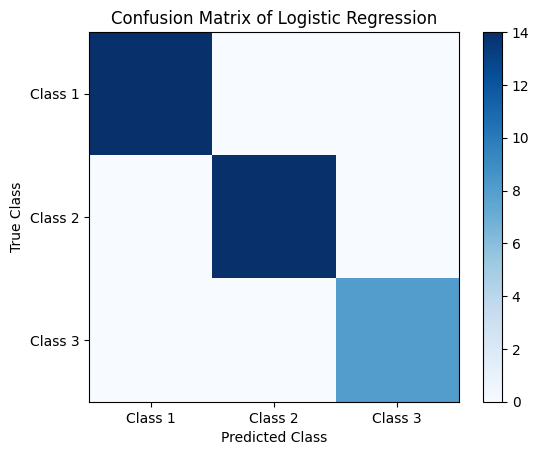

In [111]:
# Apply LDA on training data

lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)


# Fit logistic regression with LDA features on training data
logreg_lda = LogisticRegression(multi_class='auto')
logreg_lda.fit(X_train_lda, y_train)

# Generate predictions using logistic regression with LDA features
y_pred_logreg_lda = logreg_lda.predict(X_test_lda)

# Generate confusion matrix for logistic regression with LDA features
conf_mat = confusion_matrix(y_test, y_pred_logreg_lda)
plt.imshow(conf_mat, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xticks([0, 1, 2], ['Class 1', 'Class 2', 'Class 3'])
plt.yticks([0, 1, 2], ['Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()


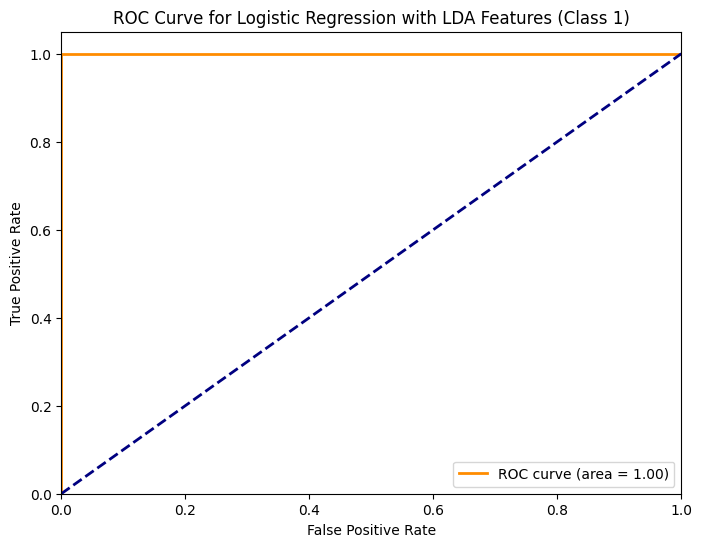

In [112]:
# Perform logistic regression with LDA features on class 1
logreg_lda_class1 = LogisticRegression()
logreg_lda_class1.fit(X_train_lda, y_train == 1)

# Compute predicted probabilities and generate ROC curve and ROC area
y_score_logreg_lda_class1 = logreg_lda_class1.predict_proba(X_test_lda)[:, 1]
fpr_logreg_lda_class1, tpr_logreg_lda_class1, thresholds_logreg_lda_class1 = roc_curve(y_test == 1, y_score_logreg_lda_class1)
roc_auc_logreg_lda_class1 = auc(fpr_logreg_lda_class1, tpr_logreg_lda_class1)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg_lda_class1, tpr_logreg_lda_class1, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_logreg_lda_class1)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression with LDA Features (Class 1)')
plt.legend(loc="lower right")
plt.show()

In [113]:
# Perform K-Nearest Neighbors
knn_scores = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    acc_knn = accuracy_score(y_test, y_pred_knn)
    knn_scores.append(acc_knn)
    print('Accuracy of K-Nearest Neighbors with k =', k, ':', acc_knn)

Accuracy of K-Nearest Neighbors with k = 1 : 0.7777777777777778
Accuracy of K-Nearest Neighbors with k = 2 : 0.7222222222222222
Accuracy of K-Nearest Neighbors with k = 3 : 0.8055555555555556
Accuracy of K-Nearest Neighbors with k = 4 : 0.75
Accuracy of K-Nearest Neighbors with k = 5 : 0.7222222222222222
Accuracy of K-Nearest Neighbors with k = 6 : 0.7222222222222222
Accuracy of K-Nearest Neighbors with k = 7 : 0.6944444444444444
Accuracy of K-Nearest Neighbors with k = 8 : 0.7222222222222222
Accuracy of K-Nearest Neighbors with k = 9 : 0.7222222222222222
Accuracy of K-Nearest Neighbors with k = 10 : 0.7222222222222222
Accuracy of K-Nearest Neighbors with k = 11 : 0.75
Accuracy of K-Nearest Neighbors with k = 12 : 0.7222222222222222
Accuracy of K-Nearest Neighbors with k = 13 : 0.7222222222222222
Accuracy of K-Nearest Neighbors with k = 14 : 0.7222222222222222
Accuracy of K-Nearest Neighbors with k = 15 : 0.75
Accuracy of K-Nearest Neighbors with k = 16 : 0.7222222222222222
Accuracy of

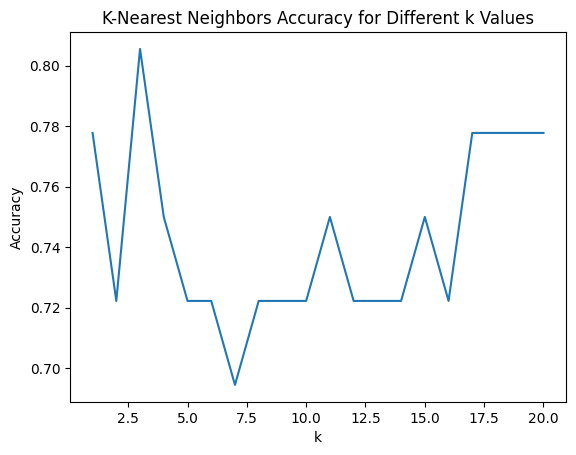

In [114]:
# Plot the accuracy of KNN for different k values
plt.plot(range(1, 21), knn_scores)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('K-Nearest Neighbors Accuracy for Different k Values')
plt.show()

In [115]:
# Perform Random Forest
rf_scores = []
for n_trees in range(1, 101, 10):
    for max_depth in range(1, 11):
        rf = RandomForestClassifier(n_estimators=n_trees, max_depth=max_depth, random_state=42)
        rf.fit(X_train, y_train)
        y_pred_rf = rf.predict(X_test)
        acc_rf = accuracy_score(y_test, y_pred_rf)
        rf_scores.append(acc_rf)
        print('Accuracy of Random Forest with n_trees =', n_trees, 'and max_depth =', max_depth, ':', acc_rf)

Accuracy of Random Forest with n_trees = 1 and max_depth = 1 : 0.5
Accuracy of Random Forest with n_trees = 1 and max_depth = 2 : 0.9166666666666666
Accuracy of Random Forest with n_trees = 1 and max_depth = 3 : 0.8055555555555556
Accuracy of Random Forest with n_trees = 1 and max_depth = 4 : 0.8055555555555556
Accuracy of Random Forest with n_trees = 1 and max_depth = 5 : 0.8333333333333334
Accuracy of Random Forest with n_trees = 1 and max_depth = 6 : 0.8333333333333334
Accuracy of Random Forest with n_trees = 1 and max_depth = 7 : 0.8333333333333334
Accuracy of Random Forest with n_trees = 1 and max_depth = 8 : 0.8333333333333334
Accuracy of Random Forest with n_trees = 1 and max_depth = 9 : 0.8333333333333334
Accuracy of Random Forest with n_trees = 1 and max_depth = 10 : 0.8333333333333334
Accuracy of Random Forest with n_trees = 11 and max_depth = 1 : 0.8611111111111112
Accuracy of Random Forest with n_trees = 11 and max_depth = 2 : 0.9444444444444444
Accuracy of Random Forest wi

In [116]:
# Predict on test set with KNN
y_pred_knn = knn.predict(X_test)
# Confusion matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion matrix for KNN:")
print(cm_knn)


Confusion matrix for KNN:
[[14  0  0]
 [ 0  9  5]
 [ 1  2  5]]


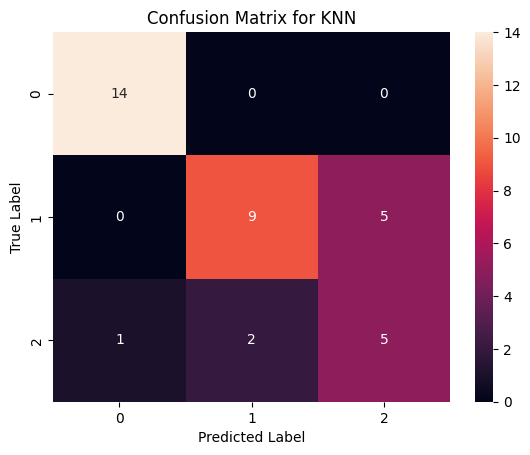

In [117]:
# Plot confusion matrix for KNN
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix for KNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [118]:
# Compute the probabilities and ROC curve of KNN
n_classes = y_test.nunique()
probas_knn_ovr = knn.predict_proba(X_test)
fpr_knn_ovr = dict()
tpr_knn_ovr = dict()
auc_knn_ovr = dict()
for i in range(n_classes):
    fpr_knn_ovr[i], tpr_knn_ovr[i], _ = roc_curve(y_test.values, probas_knn_ovr[:, i], pos_label=i)
    auc_knn_ovr[i] = auc(fpr_knn_ovr[i], tpr_knn_ovr[i])

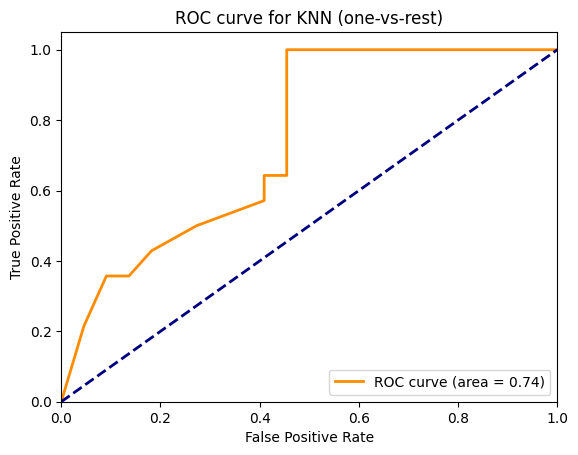

In [119]:
# Plot ROC curve for KNN
plt.figure()
lw = 2
plt.plot(fpr_knn_ovr[2], tpr_knn_ovr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_knn_ovr[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for KNN (one-vs-rest)')
plt.legend(loc="lower right")
plt.show()


In [120]:
# Load wine dataset
wine = load_wine()
# Define class names
class_names = wine.target_names
# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [121]:
# Predict on test set
y_pred_rf = rf.predict(X_test)
# Compute confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

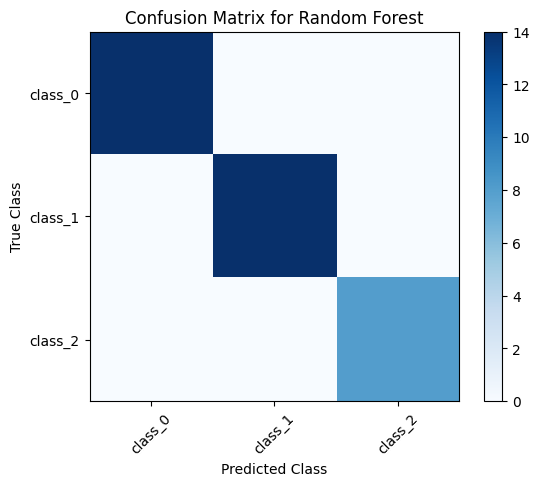

In [122]:
# Plot confusion matrix
plt.figure()
plt.imshow(cm_rf, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix for Random Forest')
plt.show()


In [123]:
# Predict class labels for test set
y_pred_rf = rf.predict(X_test)
# Compute confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Print confusion matrix
print("Confusion matrix for Random Forest:")
print(cm_rf)

Confusion matrix for Random Forest:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


In [124]:
# Compute probabilities and ROC curve for each class using One-vs-Rest strategy
probas_rf_ovr = rf.predict_proba(X_test)
n_classes = len(rf.classes_)
fpr_rf_ovr = dict()
tpr_rf_ovr = dict()
auc_rf_ovr = dict()
for i in range(n_classes):
    fpr_rf_ovr[i], tpr_rf_ovr[i], _ = roc_curve(y_test == i, probas_rf_ovr[:, i])
    auc_rf_ovr[i] = auc(fpr_rf_ovr[i], tpr_rf_ovr[i])

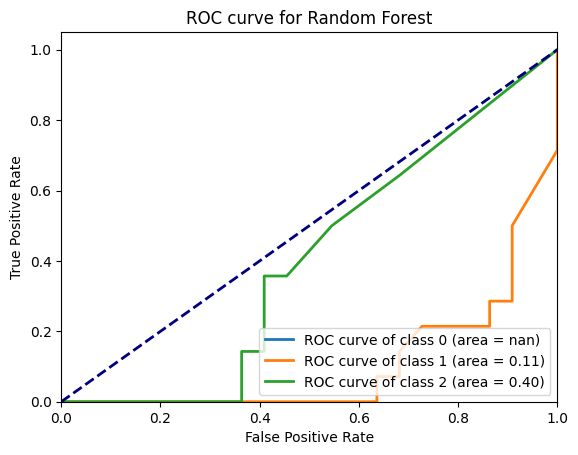

In [ ]:
# Plot ROC curve for each class
plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr_rf_ovr[i], tpr_rf_ovr[i], lw=lw,
             label='ROC curve of class %d (area = %0.2f)' % (i, auc_rf_ovr[i]))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Random Forest')
plt.legend(loc="lower right")
plt.show()


In [125]:
# Perform LDA
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)
# Perform logistic regression with LDA features
logreg_lda = LogisticRegression(multi_class='ovr', max_iter=1000)
#load wine data
wine = load_wine()
X, y = wine.data, wine.target
target_names = wine.target_names


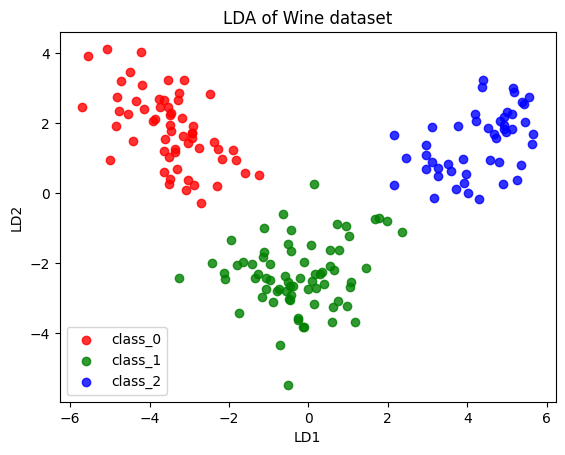

In [126]:
X_lda = lda.transform(X)

colors = ['red', 'green', 'blue']
target_names = wine.target_names

for i, color in enumerate(colors):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], alpha=.8, color=color,
                label=target_names[i])

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(loc='best')
plt.title('LDA of Wine dataset')

plt.show()


In [127]:
# Define the models and their respective hyperparameter grids for tuning
linear_reg = LinearRegression()
linear_param_grid = {}

knn = KNeighborsClassifier()
knn_param_grid = {'n_neighbors': [3, 5, 7, 9],
                  'weights': ['uniform', 'distance'],
                  'metric': ['euclidean', 'manhattan', 'minkowski']}

rf_reg = RandomForestRegressor(random_state=42)
rf_param_grid = {'n_estimators': [100, 500],
                 'max_depth': [None, 10, 20],
                 'min_samples_split': [2, 5],
                 'min_samples_leaf': [1, 2]}


In [128]:
# Define the Grid Search Cross-Validation parameters
cv = 5
scoring = 'neg_mean_squared_error'
# Tune hyperparameters for each model using Grid Search CV
linear_reg_cv = GridSearchCV(linear_reg, linear_param_grid, cv=cv, scoring=scoring)
linear_reg_cv.fit(X_train, y_train)

knn_reg_cv = GridSearchCV(knn, knn_param_grid, cv=cv, scoring=scoring)
knn_reg_cv.fit(X_train, y_train)

rf_reg_cv = GridSearchCV(rf_reg, rf_param_grid, cv=cv, scoring=scoring)
rf_reg_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 500]},
             scoring='neg_mean_squared_error')

In [129]:
# Create the classifiers
lr = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()

# Perform a grid search cross-validation with 5 folds for each classifier
lr_grid = GridSearchCV(lr, lr_params, cv=5)
rf_grid = GridSearchCV(rf, rf_params, cv=5)
knn_grid = GridSearchCV(knn, knn_params, cv=5)

# Fit the models to the training data
lr_grid.fit(X_train, y_train)
rf_grid.fit(X_train, y_train)
knn_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [103]:
# Print the best parameters and scores for each model
print('Linear Regression Best Parameters:', linear_reg_cv.best_params_)
print('Linear Regression Best Negative Mean Squared Error:', linear_reg_cv.best_score_)

print('KNN Regression Best Parameters:', knn_reg_cv.best_params_)
print('KNN Regression Best Negative Mean Squared Error:', knn_reg_cv.best_score_)

print('Random Forest Regression Best Parameters:', rf_reg_cv.best_params_)
print('Random Forest Regression Best Negative Mean Squared Error:', rf_reg_cv.best_score_)


Linear Regression Best Parameters: {}
Linear Regression Best Negative Mean Squared Error: -0.07522140337531721
KNN Regression Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
KNN Regression Best Negative Mean Squared Error: -0.02142857142857143
Random Forest Regression Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Random Forest Regression Best Negative Mean Squared Error: -0.04506991527093596


In [130]:
# Evaluate the best models on the testing set
y_pred_lr = linear_reg_cv.predict(X_test)
print('Linear Regression Test R^2 Score:', r2_score(y_test, y_pred_lr))

y_pred_knn = knn_reg_cv.predict(X_test)
print('KNN Regression Test R^2 Score:', r2_score(y_test, y_pred_knn))

y_pred_rf = rf_reg_cv.predict(X_test)
print('Random Forest Regression Test R^2 Score:', r2_score(y_test, y_pred_rf))

Linear Regression Test R^2 Score: 0.8825140263270393
KNN Regression Test R^2 Score: 0.23809523809523792
Random Forest Regression Test R^2 Score: 0.8953184761904762


Hypermeters for different Classifiers i.e, Logistic Regression, Random Forest Classifier, KNN

In [131]:
# Define the hyperparameters and the ranges of values to test for each classifier
lr_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
rf_params = {'n_estimators': [10, 50, 100, 200], 'max_depth': [1, 5, 10, None]}
knn_params = {'n_neighbors': [1, 3, 5, 7, 9], 'weights': ['uniform', 'distance']}


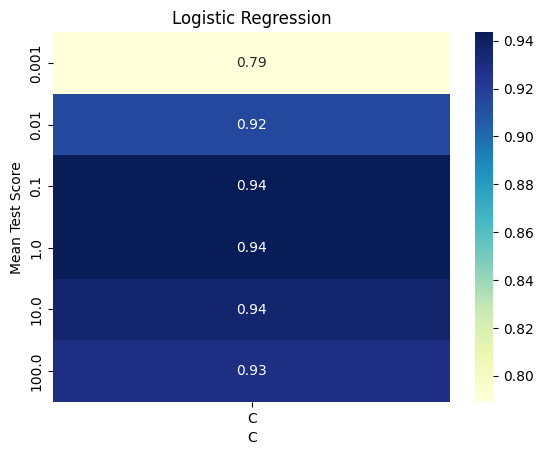

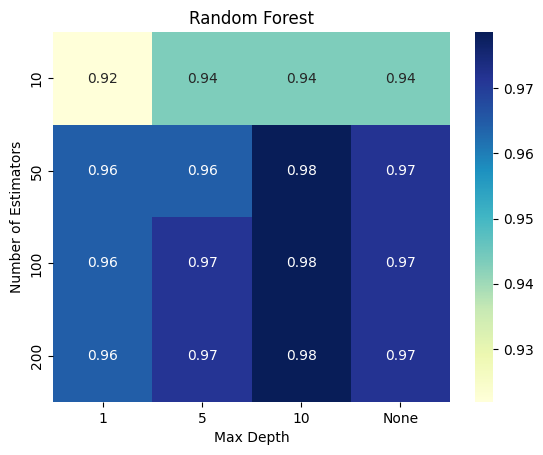

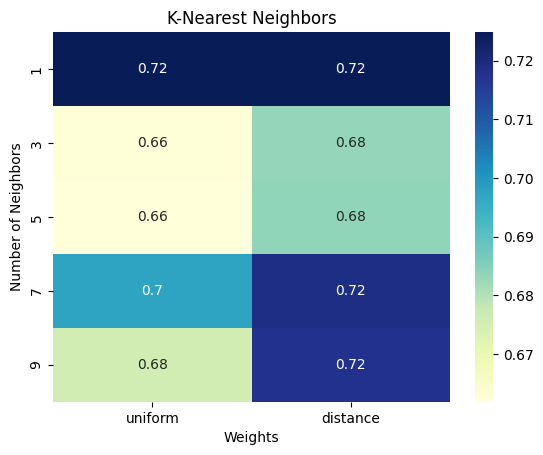

In [133]:
# Plot the heatmap for the logistic regression classifier
lr_scores = pd.DataFrame(lr_grid.cv_results_['mean_test_score'].reshape(6, 1), index=[0.001, 0.01, 0.1, 1, 10, 100], columns=['C'])
sns.heatmap(lr_scores, annot=True, cmap='YlGnBu')
plt.title('Logistic Regression')
plt.xlabel('C')
plt.ylabel('Mean Test Score')
plt.show()

# Plot the heatmap for the random forest classifier
rf_scores = pd.DataFrame(rf_grid.cv_results_['mean_test_score'].reshape(4, 4), index=[10, 50, 100, 200], columns=[1, 5, 10, 'None'])
sns.heatmap(rf_scores, annot=True, cmap='YlGnBu')
plt.title('Random Forest')
plt.xlabel('Max Depth')
plt.ylabel('Number of Estimators')
plt.show()

# Plot the heatmap for the k-nearest neighbors classifier
knn_scores = pd.DataFrame(knn_grid.cv_results_['mean_test_score'].reshape(5, 2), index=[1, 3, 5, 7, 9], columns=['uniform', 'distance'])
sns.heatmap(knn_scores, annot=True, cmap='YlGnBu')
plt.title('K-Nearest Neighbors')
plt.xlabel('Weights')
plt.ylabel('Number of Neighbors')
plt.show()


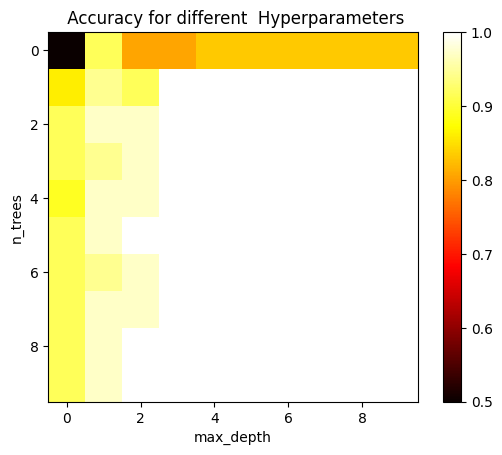

In [132]:
# Reshape the scores to a 2D array and plot as heatmap
rf_scores = np.array(rf_scores).reshape(10, 10)
plt.imshow(rf_scores, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xlabel('max_depth')
plt.ylabel('n_trees')
plt.title(' Accuracy for different  Hyperparameters')
plt.show()


Performance Metrics

In [93]:
# Define scoring metrics
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']

In [96]:
# Define classifiers
logreg = LogisticRegression(multi_class='auto')
knn = KNeighborsClassifier()
rf = RandomForestClassifier()

In [94]:
import warnings
warnings.filterwarnings('ignore')
# Evaluate models using cross-validation
for model in [logreg, knn, rf]:
    scores = cross_validate(model, X_train, y_train, cv=10, scoring=scoring)
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {scores['test_accuracy'].mean():.3f}")
    print(f"Precision: {scores['test_precision_weighted'].mean():.3f}")
    print(f"Recall: {scores['test_recall_weighted'].mean():.3f}")
    print(f"F1 Score: {scores['test_f1_weighted'].mean():.3f}")
    print()

Model: LogisticRegression
Accuracy: 0.986
Precision: 0.989
Recall: 0.986
F1 Score: 0.986

Model: KNeighborsClassifier
Accuracy: 0.958
Precision: 0.966
Recall: 0.958
F1 Score: 0.958

Model: RandomForestClassifier
Accuracy: 0.979
Precision: 0.982
Recall: 0.979
F1 Score: 0.978

